In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
# pip install tensorflow

In [2]:
import scipy.io
import numpy as np

dataset = scipy.io.loadmat('DLCV_data.mat')
Labels = list(dataset.keys())[3:]
print("Labels: ", Labels)
print("Class Dimensions: ", dataset[Labels[0]].shape)

Labels:  ['ANIMAL', 'BLOOD', 'COOKING', 'CRYING', 'DANCING', 'DINING_GROUP', 'DRIVING', 'FIGHTING', 'FOOTBALL', 'GROUP_FIGHTING', 'GROUP_TALKING', 'GUITAR', 'GUN', 'LAUGHING', 'PIANO', 'RIDING', 'RUNNING', 'SMOKING', 'SWIMMING', 'TALKING', 'TALKING_GROUP', 'WALKING']
Class Dimensions:  (400, 480, 640, 3)


In [3]:
animals  = dataset['ANIMAL']
blood    = dataset['BLOOD']
dancing  = dataset['DANCING']
talking  =  dataset['TALKING']
football =  dataset['FOOTBALL']
guitar   =  dataset['GUITAR']
gun      =  dataset['GUN']
piano    =  dataset['PIANO']
swimming =  dataset['SWIMMING']
smoking  =  dataset['SMOKING']

all_data = np.concatenate((animals, blood, dancing, talking, football,guitar,gun,piano,swimming,smoking), axis=0)

In [4]:
alo = 0 
y_trainL = []
for i in range(0,4000,400):
    for j in range(0,400):
        y_trainL.append(alo)
    alo +=1
    

y_trainL = tf.keras.utils.to_categorical(y_trainL, num_classes=10, dtype='float32')

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(all_data, y_trainL, test_size=0.2)

# x_validation, x_test, y_validation, y_test = train_test_split(x_rest, y_rest, test_size=test_ratio/(test_ratio + validation_ratio))

In [6]:
x_train, x_test = x_train/255.0 , x_test/255.0

In [7]:
def getString(list):
    if(list[0]==1):
        return "ANIMAL"
    elif(list[1]==1):
        return "BLOOD"
    elif(list[2]==1):
        return "DANCING"
    elif(list[3]==1):
        return "TALKING"
    elif(list[4]==1):
        return "FOOTBALL"
    elif(list[5]==1):
        return "GUITAR"
    elif(list[6]==1):
        return "GUN"
    elif(list[7]==1):
        return "PIANO"
    elif(list[8]==1):
        return "SWIMMING"
    else:
        return "SMOKING"


In [ ]:
# plt.figure(figsize=(50,50))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(x_train2[i])
#     # The CIFAR labels happen to be arrays, 
#     # which is why you need the extra index
#     plt.xlabel(getString(y_train[i]))
# plt.show()

In [15]:
import gc
# del all_data
# del animals  
# del blood    
# del dancing  
# del talking  
# del football 
# del guitar   
# del gun      
# del piano    
# del swimming 
# del smoking  
# del dataset
# del y_trainL

gc.collect()

0

In [17]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(480, 640, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (7, 7), activation='relu'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 478, 638, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 239, 319, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 235, 315, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 117, 157, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 111, 151, 64)      200768    
                                                                 
Total params: 252,928
Trainable params: 252,928
Non-trai

In [20]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))

In [21]:
model.summary()
# print('x_train2 ',len(x_train2))
# print('y_train ',len(y_train))
# print('x_test2',len(x_test2))
# print('y_test',y_test)
# # print('x_val',len(x_validation))
# # print('y_val',len(y_validation))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 478, 638, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 239, 319, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 235, 315, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 117, 157, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 111, 151, 64)      200768    
                                                                 
 flatten (Flatten)           (None, 1072704)           0

In [22]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
100/100 [==============================] - 1474s 15s/step - loss: 2.4281 - accuracy: 0.1013 - val_loss: 2.3084 - val_accuracy: 0.0900
Epoch 2/10
100/100 [==============================] - 1419s 14s/step - loss: 2.3071 - accuracy: 0.0962 - val_loss: 2.3045 - val_accuracy: 0.0975
Epoch 3/10
100/100 [==============================] - 1412s 14s/step - loss: 2.3071 - accuracy: 0.0956 - val_loss: 2.3051 - val_accuracy: 0.0975
Epoch 4/10
100/100 [==============================] - 1411s 14s/step - loss: 2.3118 - accuracy: 0.1041 - val_loss: 2.3139 - val_accuracy: 0.1037
Epoch 5/10
100/100 [==============================] - 1408s 14s/step - loss: 2.3084 - accuracy: 0.0988 - val_loss: 2.3247 - val_accuracy: 0.0975
Epoch 6/10
100/100 [==============================] - 1433s 14s/step - loss: 2.3097 - accuracy: 0.0962 - val_loss: 2.3031 - val_accuracy: 0.0950
Epoch 7/10
100/100 [==============================] - 1410s 14s/step - loss: 2.3103 - accuracy: 0.1056 - val_loss: 2.3052 - val_ac

25/25 - 93s - loss: 2.3025 - accuracy: 0.1013 - 93s/epoch - 4s/step


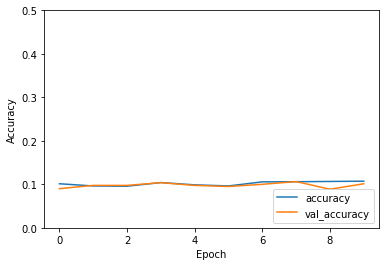

In [25]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 0.5])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)
# test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
import gc
del x_train2
gc.collect()

In [26]:
print(test_acc)

0.10125000029802322
